In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\Dataset-Python-001\Dataset\car_prices.csv")

In [5]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [6]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (558837, 16)
Columns: ['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice', 'saledate']


In [7]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [8]:
# Missing values
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [9]:
# Drop columns with >50% nulls
df = df.dropna(thresh=len(df)*0.5, axis=1)

In [10]:
# Fill numeric nulls with median
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

In [11]:
# Fill categorical nulls with mode
for col in df.select_dtypes(exclude=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [12]:
# Drop duplicates
df = df.drop_duplicates()

In [13]:
# Avg, min, max price
print("Average Price:", df["sellingprice"].mean())
print("Min Price:", df["sellingprice"].min())
print("Max Price:", df["sellingprice"].max())

Average Price: 13611.326356343621
Min Price: 1.0
Max Price: 230000.0


In [14]:
# Unique colors
print("Unique Colors:", df["color"].unique())

Unique Colors: ['white' 'gray' 'black' 'red' 'silver' 'blue' 'brown' 'beige' 'purple'
 'burgundy' '—' 'gold' 'yellow' 'green' 'charcoal' 'orange' 'off-white'
 'turquoise' 'pink' 'lime' '4802' '9410' '1167' '2172' '14872' '12655'
 '15719' '6388' '16633' '11034' '2711' '6864' '339' '18384' '9887' '9837'
 '20379' '20627' '721' '6158' '2817' '5705' '18561' '2846' '9562' '5001']


In [15]:
# Unique brands & models
print("Unique Brands:", df["make"].nunique())
print("Unique Models:", df["model"].nunique())

Unique Brands: 96
Unique Models: 973


In [16]:
# Cars with price > 165000
df[df["sellingprice"] > 165000]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
125095,2012,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s58cux50727,fl,45.0,14316.0,black,beige,braman motorcars,154000.0,169500.0,Wed Jan 14 2015 01:40:00 GMT-0800 (PST)
344905,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j98eua23833,mo,43.0,27802.0,green,tan,ford-lincoln dealer program,22800.0,230000.0,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
446949,2015,Mercedes-Benz,S-Class,S65 AMG,Sedan,automatic,wddug7kb2fa102347,ca,41.0,5277.0,white,white,mercedes-benz usa,170000.0,173000.0,Thu May 21 2015 05:00:00 GMT-0700 (PDT)
538347,2012,Rolls-Royce,Ghost,Base,sedan,automatic,sca664s59cux50803,ca,44.0,5215.0,white,tan,financial services remarketing (bmw int),166000.0,167000.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
545523,2013,Rolls-Royce,Ghost,Base,sedan,automatic,sca664s52dux52152,fl,42.0,7852.0,white,beige,flag/landrover southpointe,178000.0,171500.0,Wed Jun 17 2015 03:05:00 GMT-0700 (PDT)
548169,2011,Ferrari,458 Italia,Base,coupe,automatic,zff67nfa1b0178698,fl,46.0,12116.0,red,black,platinum motor cars,182000.0,183000.0,Wed Jun 17 2015 03:40:00 GMT-0700 (PDT)
557570,2012,Rolls-Royce,Ghost,EWB,sedan,automatic,sca664l50cux65625,ca,36.0,11832.0,white,black,bentley scottsdale,164000.0,169000.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)


In [17]:
# Top 5 most frequent models
df["model"].value_counts().head(5)

model
Altima    29748
F-150     14479
Fusion    12946
Camry     12545
Escape    11861
Name: count, dtype: int64

In [18]:
# Avg price by brand
df.groupby("make")["sellingprice"].mean().sort_values(ascending=False)

make
Rolls-Royce    153488.235294
Ferrari        127210.526316
Lamborghini    112625.000000
Bentley         74367.672414
airstream       71000.000000
                   ...      
dodge tk          550.000000
Geo               528.947368
dot               500.000000
ford truck        483.333333
Daewoo            400.000000
Name: sellingprice, Length: 96, dtype: float64

In [19]:
# Min price by interior
df.groupby("interior")["sellingprice"].min().sort_values()

interior
black           1.0
gray            1.0
green         100.0
beige         100.0
tan           100.0
blue          150.0
silver        150.0
—             150.0
burgundy      175.0
red           200.0
purple        200.0
brown         200.0
gold          250.0
white         350.0
off-white     900.0
orange       1200.0
yellow       3100.0
Name: sellingprice, dtype: float64

In [20]:
# Max odometer per year
df.groupby("year")["odometer"].max().sort_values(ascending=False)

year
1997    999999.0
1996    999999.0
2014    999999.0
2013    999999.0
1998    999999.0
1999    999999.0
1993    999999.0
2010    999999.0
2009    999999.0
2012    999999.0
2008    999999.0
2007    999999.0
2005    999999.0
2006    999999.0
2004    999999.0
2003    999999.0
2002    999999.0
2001    999999.0
2011    999999.0
2000    462579.0
1995    396793.0
1992    379307.0
1994    356402.0
1991    274149.0
1986    273327.0
1990    265498.0
1988    241751.0
1987    230946.0
1989    218052.0
1984    170799.0
1985    121644.0
2015    100454.0
1982     85738.0
1983     42697.0
Name: odometer, dtype: float64

In [21]:
# Add car age (2025 as current year)
df["car_age_2025"] = 2025 - df["year"]

In [22]:
# Cars with condition >=48 and odometer >90000
df[(df["condition"] >= 48) & (df["odometer"] > 90000)].shape[0]

746

In [23]:
# State with highest avg price for newer cars (year > 2013)
newer = df[df["year"] > 2013]
newer.groupby("state")["sellingprice"].mean().sort_values(ascending=False).head(1)

state
oh    28020.221053
Name: sellingprice, dtype: float64

In [24]:
# State with highest avg price for newer cars (year > 2013)
newer = df[df["year"] > 2013]
newer.groupby("state")["sellingprice"].mean().sort_values(ascending=False).head(1)

state
oh    28020.221053
Name: sellingprice, dtype: float64

In [26]:
# Top-20% condition threshold
threshold = df["condition"].quantile(0.8)
print("Condition threshold:", threshold)

# Makes with lowest avg price among top-20% condition cars
top20 = df[df["condition"] >= threshold]
top20.groupby("make")["sellingprice"].mean().sort_values().head(10)

Condition threshold: 43.0


make
Isuzu         1125.000000
Oldsmobile    1910.000000
honda         4233.333333
Saturn        5700.406504
subaru        6200.000000
chrysler      6225.000000
smart         6835.759494
mazda         7275.000000
Pontiac       7686.824324
Saab          7711.111111
Name: sellingprice, dtype: float64

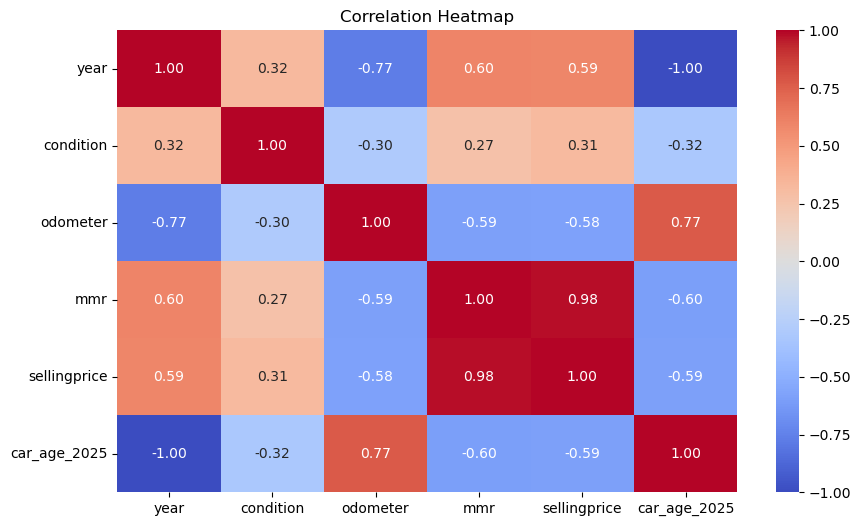

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

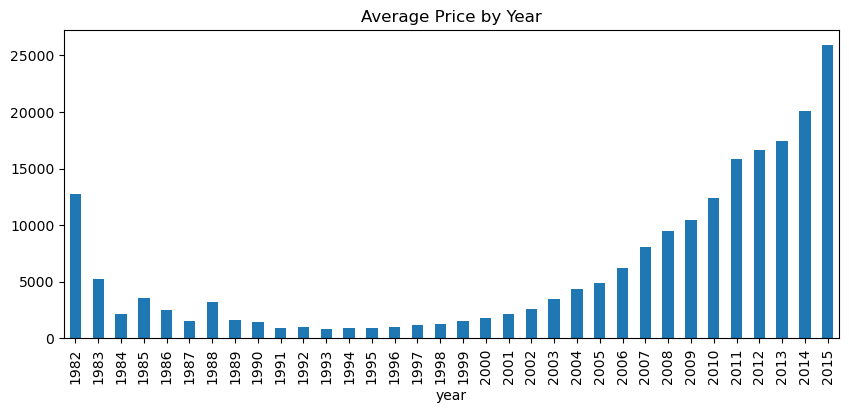

In [29]:
# 2. Avg price by year (bar)
df.groupby("year")["sellingprice"].mean().plot(kind="bar", figsize=(10,4))
plt.title("Average Price by Year")
plt.show()

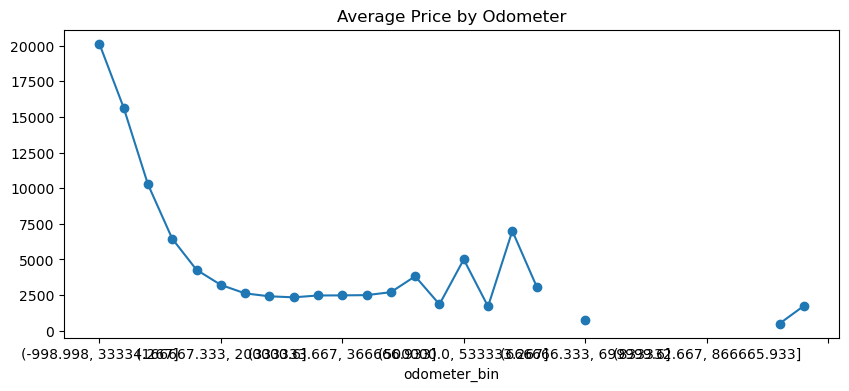

In [31]:
# 3. Avg price by odometer (line with bins)
df["odometer_bin"] = pd.cut(df["odometer"], bins=30)
avg_by_odometer = df.groupby("odometer_bin", observed=False)["sellingprice"].mean()
avg_by_odometer.plot(kind="line", marker="o", figsize=(10,4))
plt.title("Average Price by Odometer")
plt.show()

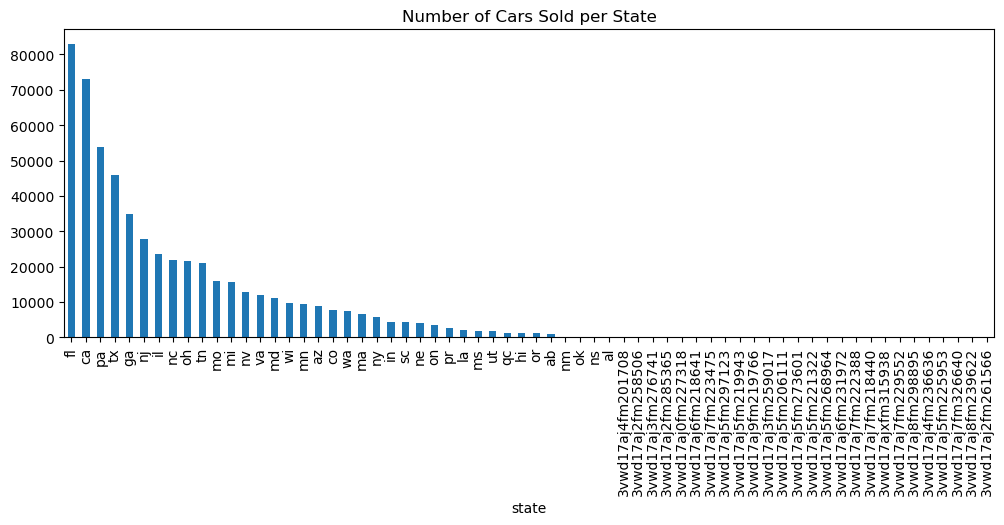

In [32]:
# 4. Cars sold per state
df["state"].value_counts().plot(kind="bar", figsize=(12,4))
plt.title("Number of Cars Sold per State")
plt.show()

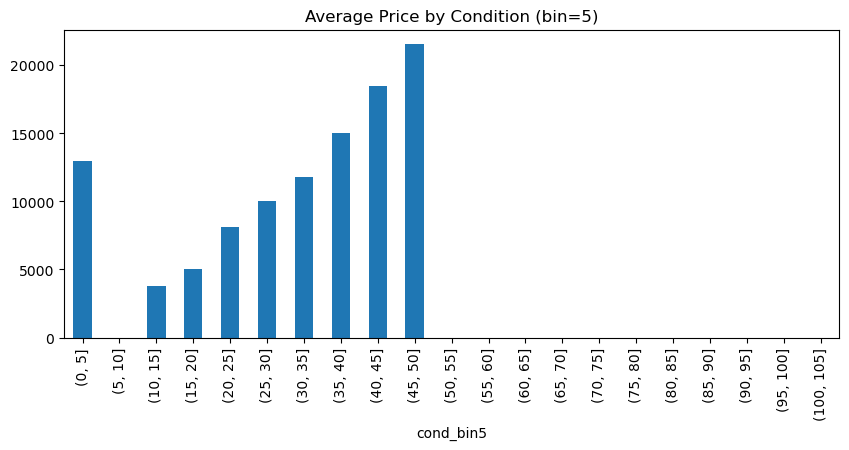

In [34]:
# 5. Avg price by condition ranges (bin=5)
df["cond_bin5"] = pd.cut(df["condition"], bins=range(0, 110, 5))
df.groupby("cond_bin5", observed=False)["sellingprice"].mean().plot(kind="bar", figsize=(10,4))
plt.title("Average Price by Condition (bin=5)")
plt.show()

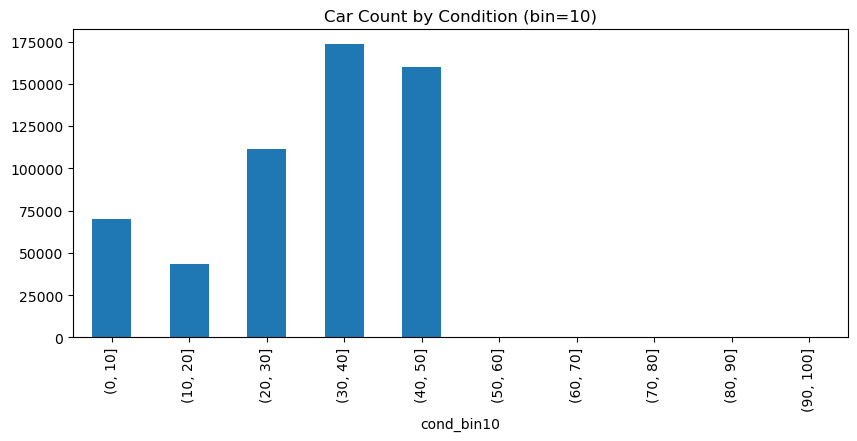

In [35]:
# 6. Car count by condition ranges (bin=10)
df["cond_bin10"] = pd.cut(df["condition"], bins=range(0, 110, 10))
df["cond_bin10"].value_counts().sort_index().plot(kind="bar", figsize=(10,4))
plt.title("Car Count by Condition (bin=10)")
plt.show()

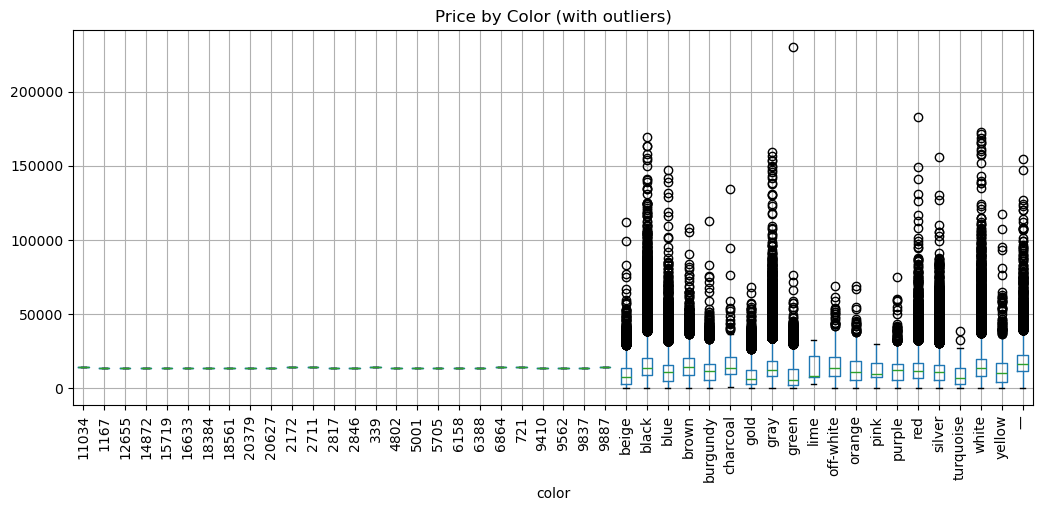

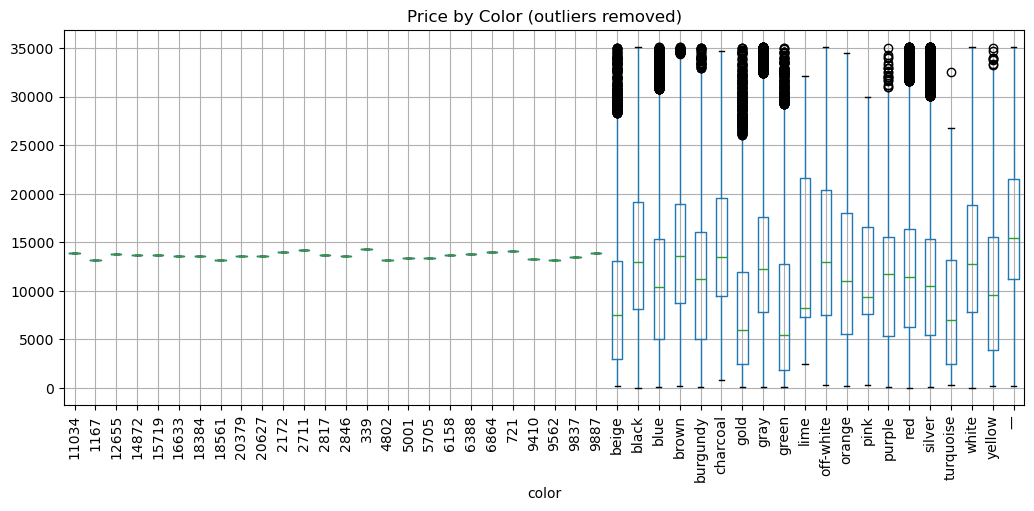

In [36]:
# 7. Boxplot by color (with outliers)
df.boxplot(column="sellingprice", by="color", figsize=(12,5), rot=90)
plt.title("Price by Color (with outliers)")
plt.suptitle("")
plt.show()

# Remove outliers using IQR
Q1 = df["sellingprice"].quantile(0.25)
Q3 = df["sellingprice"].quantile(0.75)
IQR = Q3 - Q1
df_no_out = df[(df["sellingprice"] >= Q1 - 1.5*IQR) & (df["sellingprice"] <= Q3 + 1.5*IQR)]

# Replot without outliers
df_no_out.boxplot(column="sellingprice", by="color", figsize=(12,5), rot=90)
plt.title("Price by Color (outliers removed)")
plt.suptitle("")
plt.show()